# Parte 1: Edad de Cangrejos
Mariana Ramirez, Santiago Hoyos y Camila Nahuel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

## Carga de datos

In [ ]:
df = pd.read_csv('CrabAgePrediction_Subset1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1946 non-null   object 
 1   Length          1946 non-null   float64
 2   Diameter        1946 non-null   float64
 3   Height          1946 non-null   float64
 4   Weight          1946 non-null   float64
 5   Shucked Weight  1946 non-null   float64
 6   Viscera Weight  1946 non-null   float64
 7   Shell Weight    1946 non-null   float64
 8   Age             1946 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 137.0+ KB


In [ ]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


## a) Análisis exploratorio de datos
#### Correlación entre todas las variables numéricas

<ipython-input-20-77b4eeeb0202>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


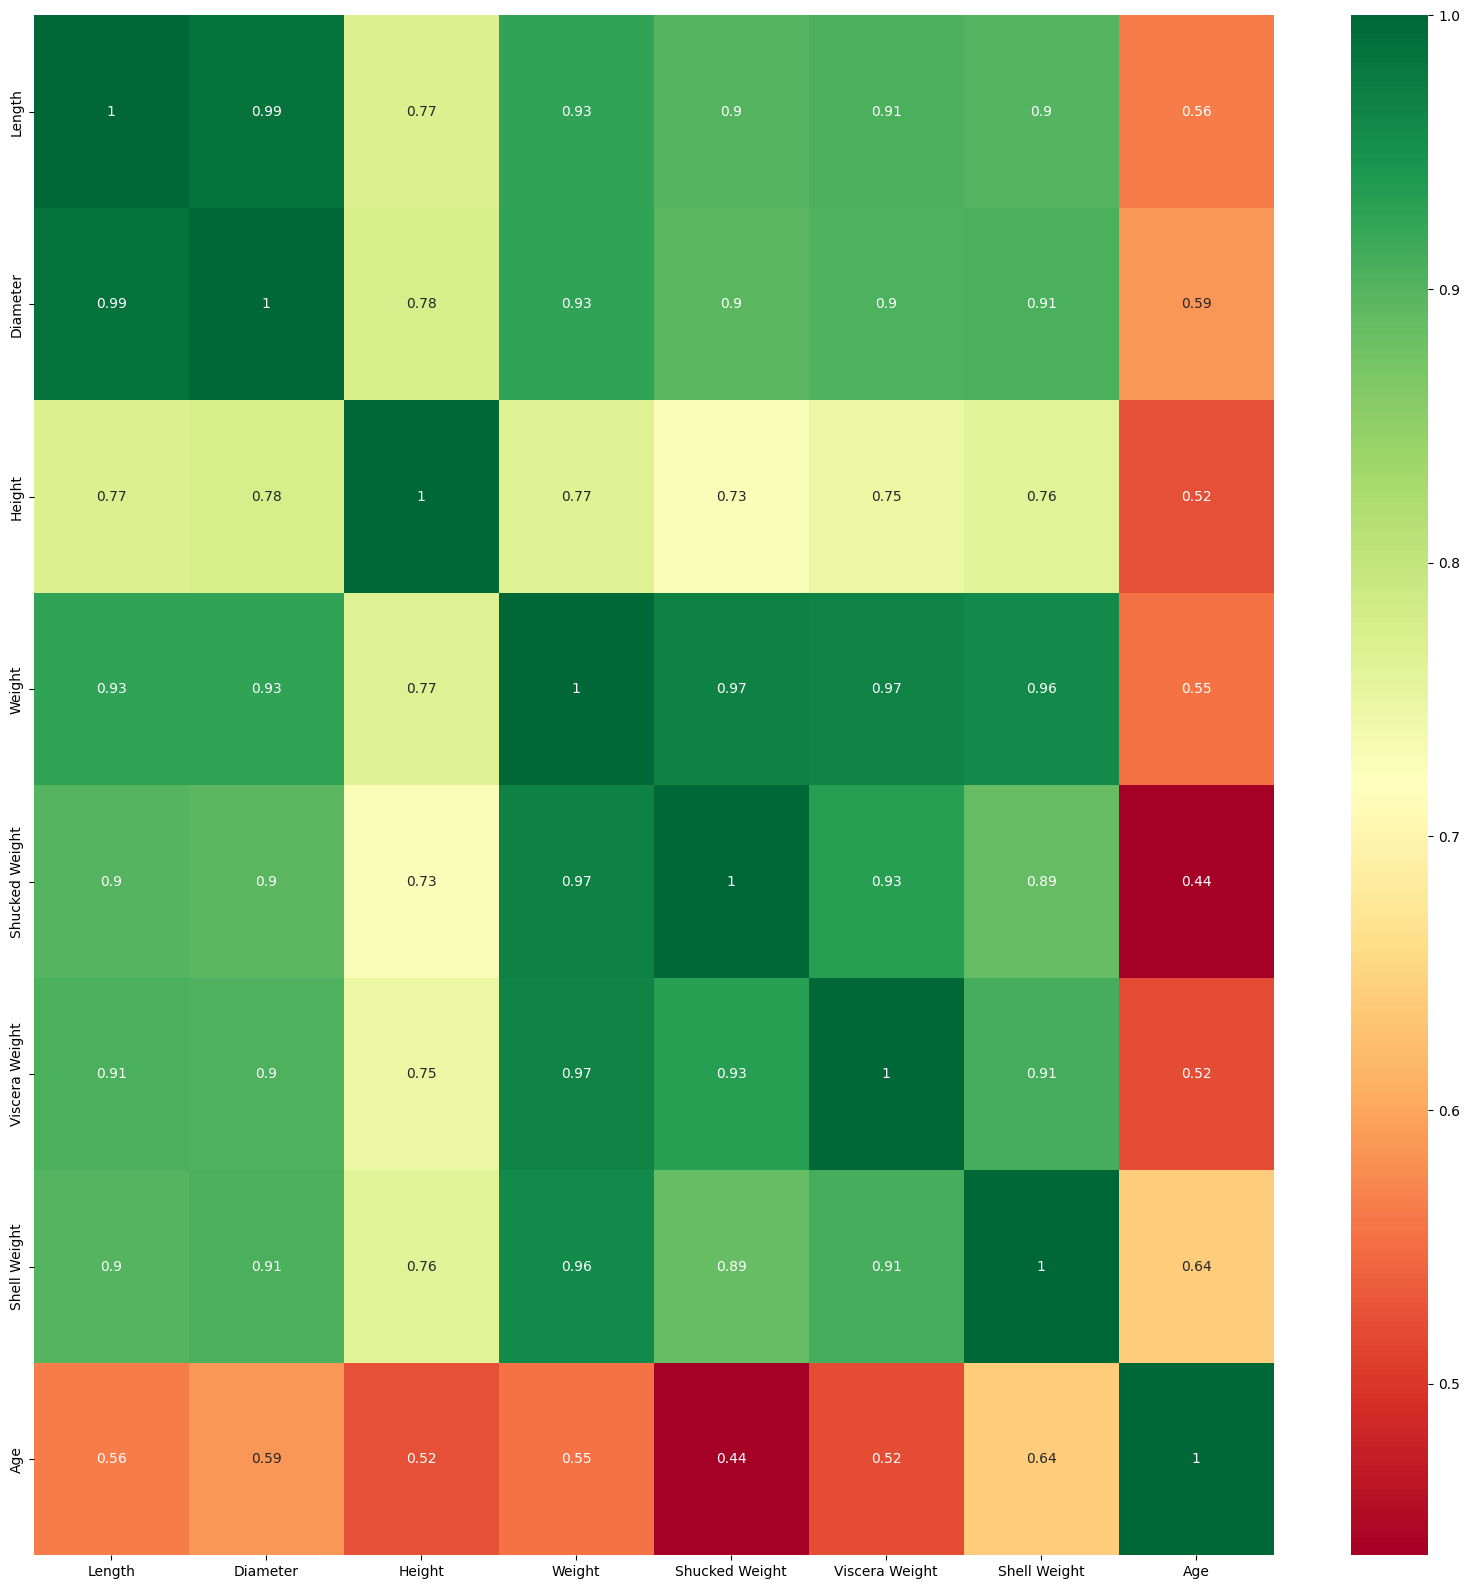

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Como podemos observar en la matriz de correlación anterior, todas las variables tiene una baja correlación con la varible objetivo 'Age'. Esto indica que sacar un modelo lineal respecto a esta varibles es viable, ya que no existe colinealidad entre estas.

Ahora vamos a dividir nuestra base en 2:
* y - varible objetivo 'Age'
* X - el resto de variables

In [ ]:
y = df[['Age']]
X = df.drop(columns=['Age'])

Con esta división vamos a graficar todas las variables vs la varible 'age' para tener un mayor entendimiento de esta y si es necesario utilizar todas estas o existe alguna que podamos excluir.

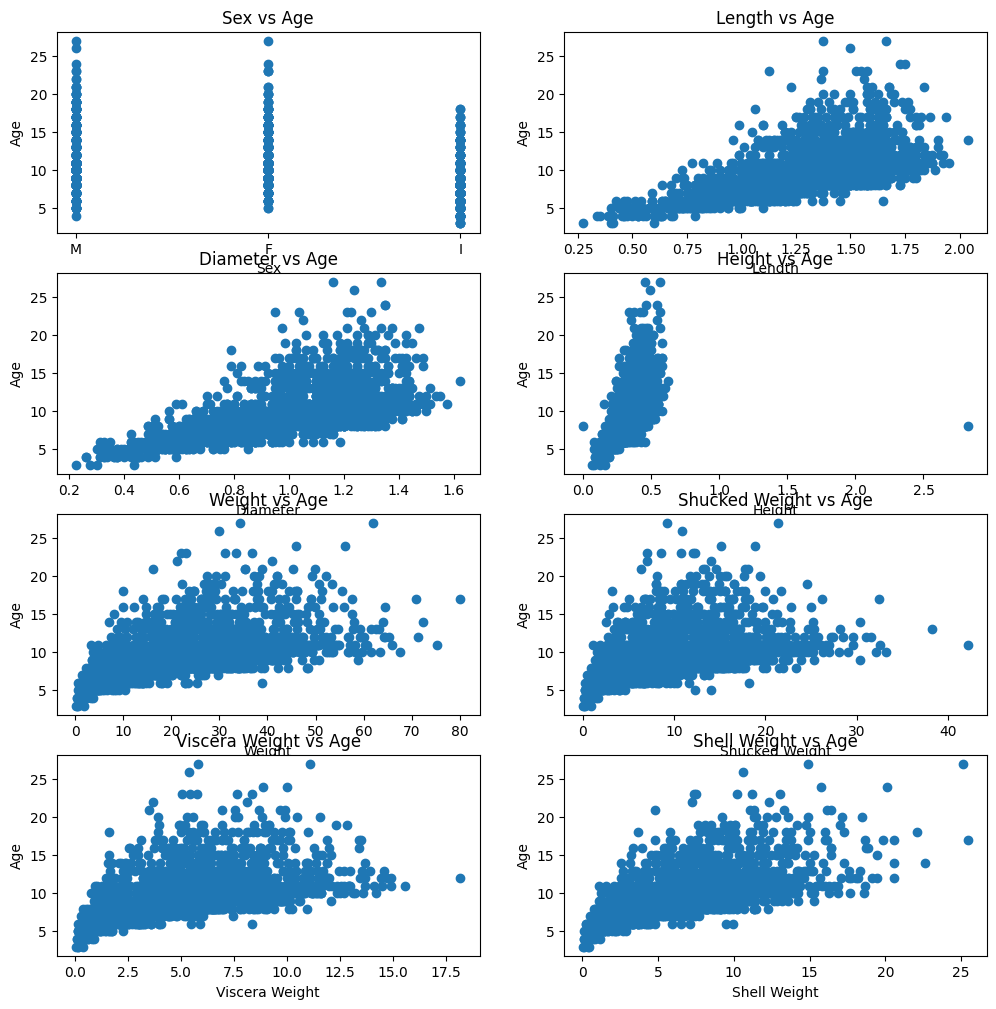

In [ ]:
num_plots = X.shape[1]
num_cols = 2  # Number of columns of subplots
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array if needed
if num_rows > 1:
    axes = axes.flatten()

# Create plots for each feature
for i, (col_name, col_data) in enumerate(X.items()):
    ax = axes[i]
    ax.scatter(col_data, y)
    ax.set_title(f'{col_name} vs Age')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Age')

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust layout
plt.show()

Basándose en las gráficas anteriores se decidió que la variable 'Sex' no afecta a la variable objetivo y por lo tanto no se va a utilizar para la regresión.
Por otro lado, las demás variables tiene relación y coeficiente positivo frente a la edad por lo que podemos esperar que a mayo valor de cualquier variable en X mayor edad del cangrejo.

## b) Modelo

Esta vez entonces vamos a escoger una X sin 'Age' y sin 'Sex'. Luego dividimos nuestros X y y en train y validation data. En este caso el train tiene 70% de los datos miesntras que el test tiene 30%.

In [ ]:
y = df[['Age']]
X = df.drop(columns=['Age','Sex'])

In [ ]:
XTrain, XVal, yTrain, yVal = train_test_split(X, y, test_size=0.30, random_state=42)

#### Regresión lineal múltiple

In [ ]:
regr1 = LinearRegression()
regr1.fit(XTrain, yTrain)
pred = regr1.predict(XVal)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(yVal, pred)))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(pd.Series(regr1.coef_[0], index = X.columns))
print('Intercept: ',regr1.intercept_)

RSME:  2.299761953403562
MAE:  1.678384838679058


Length           -2.125002
Diameter          7.978248
Height            2.878205
Weight            0.154205
Shucked Weight   -0.541676
Viscera Weight   -0.120520
Shell Weight      0.448557
dtype: float64
Intercept:  [2.99781022]


#### Regresión polinomial de grado 2

In [ ]:
degree = 2  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(XTrain)
X_poly_val = poly.transform(XVal)

# Fitting Polynomial Regression
poly_regr = LinearRegression()
poly_regr.fit(X_poly_train, yTrain)
pred1 = poly_regr.predict(X_poly_val)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(yVal, pred1)))
print("MAE: ", mean_absolute_error(yVal, pred1))
print('\n')
print(poly_regr.coef_)
#print(pd.Series(poly_regr.coef_, index = X.columns))
print('Intercept: ',poly_regr.intercept_)

RSME:  2.367766169631161
MAE:  1.6470140386320933


[[ 2.76556916e-11 -1.05586958e+01  1.91014803e+01  1.24670377e+01
   9.04618849e-01 -1.64430211e+00  2.24165454e-01 -2.18573578e-01
   1.24181088e+01 -3.92836946e+00 -6.35391793e+01 -8.26970325e-01
   1.36249338e+00 -1.17122332e+00  1.64469929e+00 -2.06191716e+01
   8.28299394e+01 -1.68475082e-01  1.04901758e-01  1.17153084e+00
  -7.92788764e-03 -1.96057159e+00  1.57551683e+00 -2.75038342e+00
   8.50138354e-02 -2.16036220e+00  8.27792868e-03 -6.57230199e-02
   6.45450356e-02  1.38607620e-02  8.37731914e-02 -6.00691754e-02
   1.03158707e-02 -1.33693468e-02 -1.18523344e-01 -3.85676422e-02]]
Intercept:  [1.70466241]


#### Regresión Polinomial de grado 3

In [ ]:
degree = 3  # Choose the degree of the polynomial
poly2 = PolynomialFeatures(degree)
X_poly_train2 = poly2.fit_transform(XTrain)
X_poly_val2 = poly2.transform(XVal)

# Fitting Polynomial Regression
poly_regr2 = LinearRegression()
poly_regr2.fit(X_poly_train2, yTrain)
pred2 = poly_regr2.predict(X_poly_val2)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(yVal, pred2)))
print("MAE: ", mean_absolute_error(yVal, pred2))
print('\n')
print(poly_regr2.coef_)
#print(pd.Series(poly_regr2.coef_, index = X.columns))
print('Intercept: ',poly_regr2.intercept_)

RSME:  5.447088695113623
MAE:  1.9183315684668913


[[ 1.61737716e-06 -6.01342621e+01  1.01957081e+02 -5.66660230e+01
   2.90215670e+00 -7.80199319e+00 -1.57490584e+00  3.95890667e+00
   1.16444493e+01  2.74777201e+02 -1.36765420e+02 -8.86145712e+00
   1.61069328e+01  5.43469021e+00 -2.21096307e+01 -4.29483594e+02
   2.65519409e+02 -4.87631066e+00 -5.60718192e-01  1.97800829e+01
   3.88921082e+01  2.09843856e+02  1.62286570e+01  1.75359830e-02
  -3.73502001e+01 -3.95119655e+01 -1.11826500e-02 -4.09619680e-01
   6.20576867e-01  1.04748546e+00  3.45681139e-01 -6.18910057e-01
  -1.95797772e-01 -4.16370719e-01 -2.01909740e+00 -1.14301923e+00
   2.91105608e+02 -1.43703253e+03  8.30716322e+02  2.31579668e+01
  -2.30876743e+01 -1.69392546e+01 -2.42591209e+01  1.84024744e+03
  -1.03982079e+03 -4.04368458e+01  3.90857839e+01  1.80829739e+01
   7.56911376e+01 -1.94298990e+03 -2.54830406e+01  6.28829908e+00
   4.09420401e+01  8.49557971e+01 -5.20254918e-01  1.13036150e-02
   3.22842067e+00  8.876

Comparando estos 3 modelos, podemos ver que el que presenta un error cuadrártico médio raiz y MAE más pequeños es nuestro modelo de regresión lineal múltiple. Por lo que, vamos a escoger este para el último training y validación con todos los datos juntos.

## c) Validación y entrenamiento final
Uniendo train y validation data vamos a re-entrenar nuestro modelo y calcular RSME y MAE con todos los datos

In [ ]:
frames = [XTrain,XVal]
frames1 = [yTrain,yVal]

X_final = pd.concat(frames)
y_final = pd.concat(frames1)

In [ ]:
regr1.fit(X_final, y_final)
pred = regr1.predict(X_final)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(y_final, pred)))
print("MAE: ", mean_absolute_error(y_final, pred))
print('\n')
print(pd.Series(regr1.coef_[0], index = X.columns))
print('Intercept: ',regr1.intercept_)

RSME:  2.2155069265183625
MAE:  1.6003066003867858


Length           -1.564781
Diameter          6.687444
Height            3.044111
Weight            0.185472
Shucked Weight   -0.583753
Viscera Weight   -0.181291
Shell Weight      0.496519
dtype: float64
Intercept:  [3.19509296]


## Conclusiones
*  El diametro del cangrejo es la variable que tiene más peso en definir la edad del cangrejo en la regresión lineal
* Los errores entre el primer modelo que entrenamos con 70% de los datos y del modelo entrenado con 100% de los datos no cambian mucho, solo en un 1%.
* Los coeficientes de este modelos no son los esperados, ya que para todas las variables, cuando las graficamos contra la edad, se mostraban relaciones positivas pero las variables: Length, Shucked Weight y Viscera Weight tienen coeficientes negativos.